In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
# Veri setini yükle
df=pd.read_csv('df.csv')

Aykırı Değer Analizi ve Görselleştirme


�� Customer_ID Değişkeni İçin Aykırı Değer Analizi
----------------------------------------
IQR Yöntemi:
  Aykırı değer sayısı: 0
  Aykırı değer oranı: %0.00
  Alt sınır: -498.50, Üst sınır: 1499.50

Z-Score Yöntemi:
  Z-Score > 3 olan aykırı değer sayısı: 0
  Z-Score > 3 olan aykırı değer oranı: %0.00


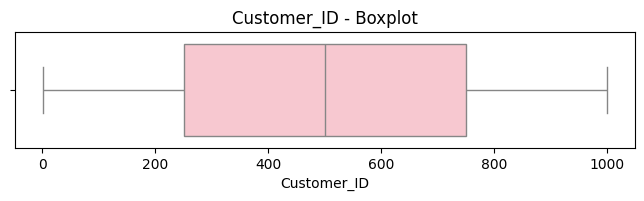

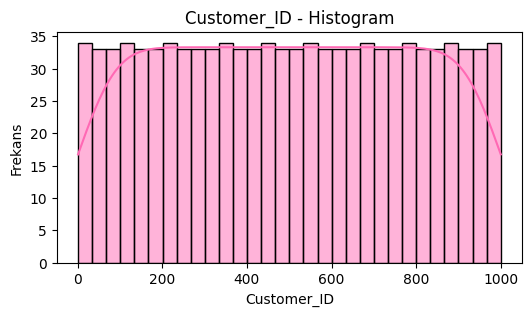

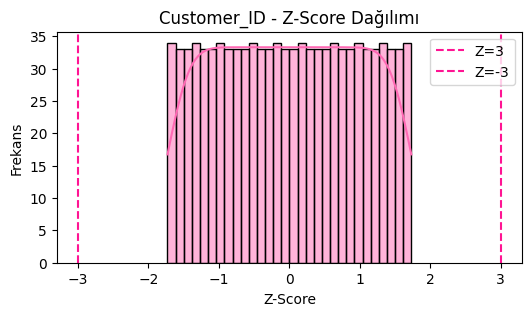


�� Age Değişkeni İçin Aykırı Değer Analizi
----------------------------------------
IQR Yöntemi:
  Aykırı değer sayısı: 0
  Aykırı değer oranı: %0.00
  Alt sınır: -6.50, Üst sınır: 93.50

Z-Score Yöntemi:
  Z-Score > 3 olan aykırı değer sayısı: 0
  Z-Score > 3 olan aykırı değer oranı: %0.00


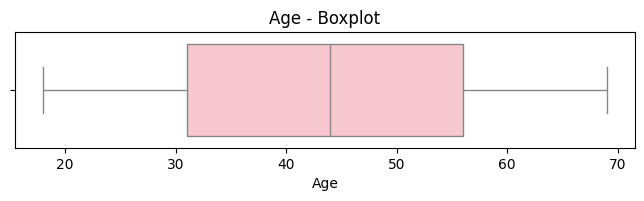

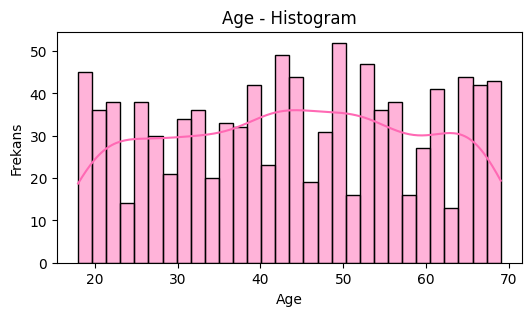

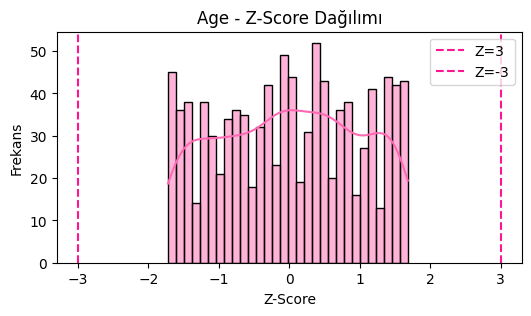


�� Num_Interactions Değişkeni İçin Aykırı Değer Analizi
----------------------------------------
IQR Yöntemi:
  Aykırı değer sayısı: 0
  Aykırı değer oranı: %0.00
  Alt sınır: -6.50, Üst sınır: 21.50

Z-Score Yöntemi:
  Z-Score > 3 olan aykırı değer sayısı: 0
  Z-Score > 3 olan aykırı değer oranı: %0.00


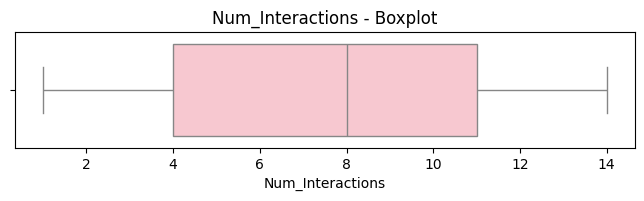

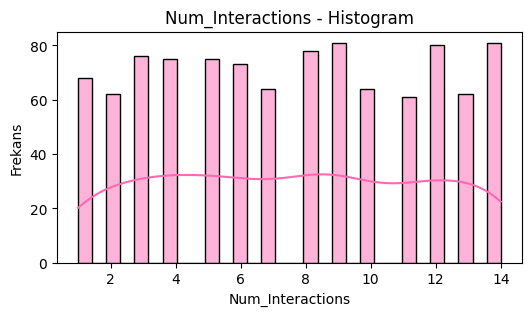

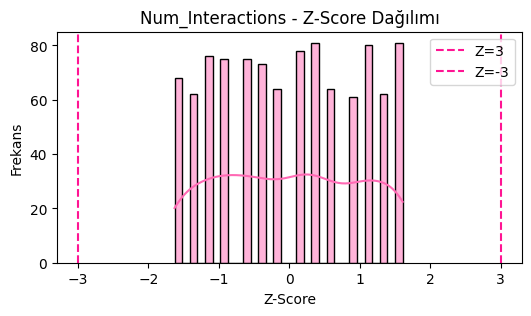


�� Feedback_Score Değişkeni İçin Aykırı Değer Analizi
----------------------------------------
IQR Yöntemi:
  Aykırı değer sayısı: 0
  Aykırı değer oranı: %0.00
  Alt sınır: -1.00, Üst sınır: 7.00

Z-Score Yöntemi:
  Z-Score > 3 olan aykırı değer sayısı: 0
  Z-Score > 3 olan aykırı değer oranı: %0.00


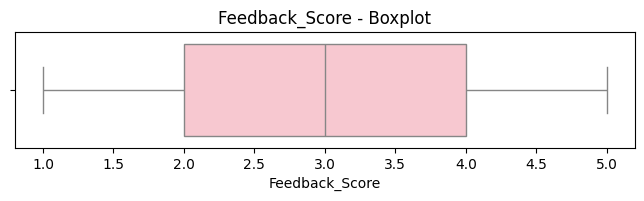

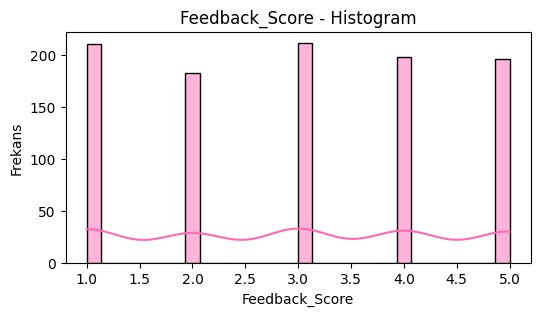

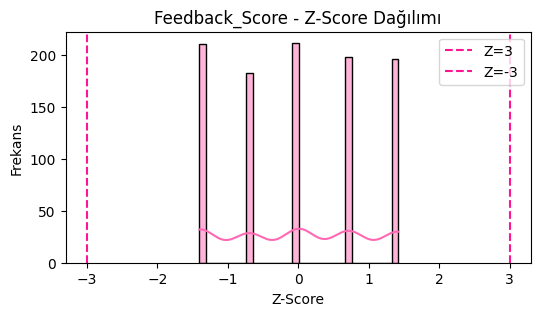


�� Products_Purchased Değişkeni İçin Aykırı Değer Analizi
----------------------------------------
IQR Yöntemi:
  Aykırı değer sayısı: 0
  Aykırı değer oranı: %0.00
  Alt sınır: -7.50, Üst sınır: 28.50

Z-Score Yöntemi:
  Z-Score > 3 olan aykırı değer sayısı: 0
  Z-Score > 3 olan aykırı değer oranı: %0.00


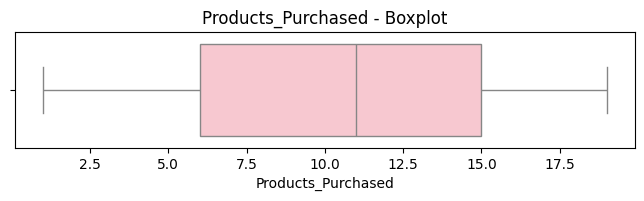

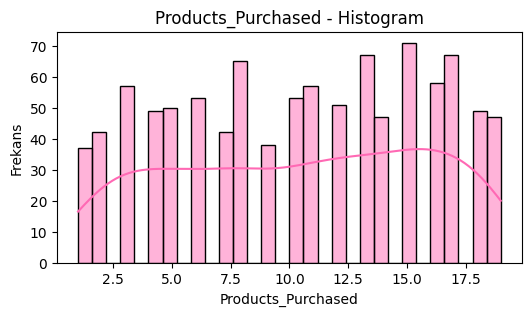

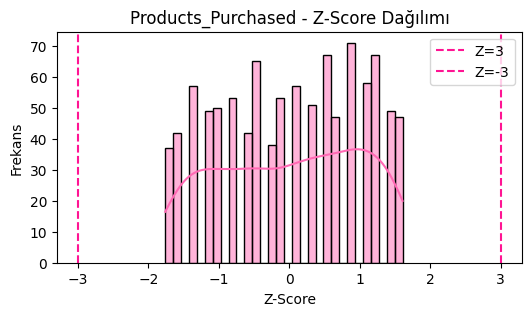


�� Products_Viewed Değişkeni İçin Aykırı Değer Analizi
----------------------------------------
IQR Yöntemi:
  Aykırı değer sayısı: 0
  Aykırı değer oranı: %0.00
  Alt sınır: -14.50, Üst sınır: 69.50

Z-Score Yöntemi:
  Z-Score > 3 olan aykırı değer sayısı: 0
  Z-Score > 3 olan aykırı değer oranı: %0.00


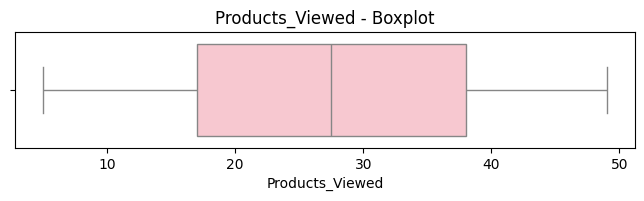

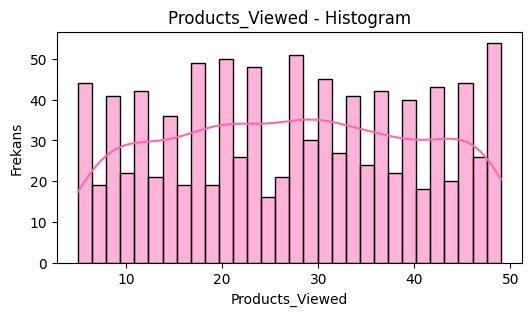

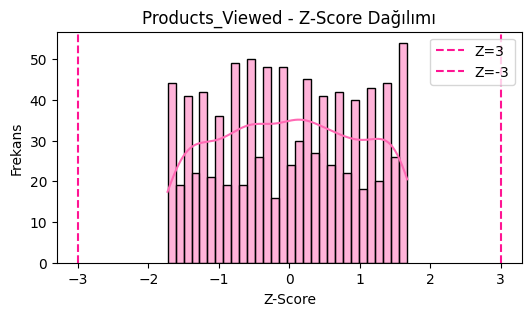


�� Time_Spent_on_Site Değişkeni İçin Aykırı Değer Analizi
----------------------------------------
IQR Yöntemi:
  Aykırı değer sayısı: 0
  Aykırı değer oranı: %0.00
  Alt sınır: -21.81, Üst sınır: 86.58

Z-Score Yöntemi:
  Z-Score > 3 olan aykırı değer sayısı: 0
  Z-Score > 3 olan aykırı değer oranı: %0.00


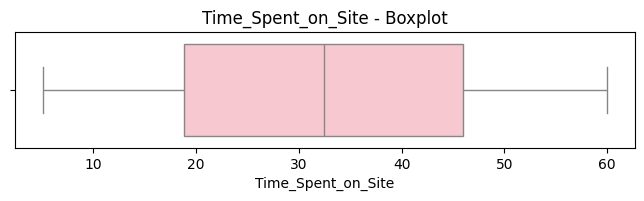

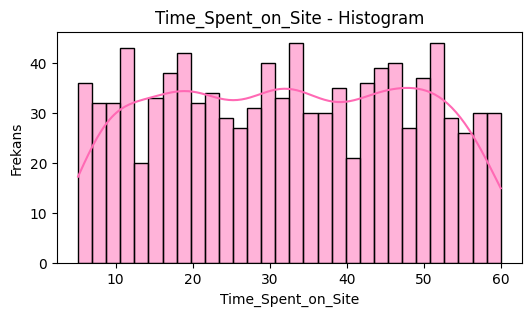

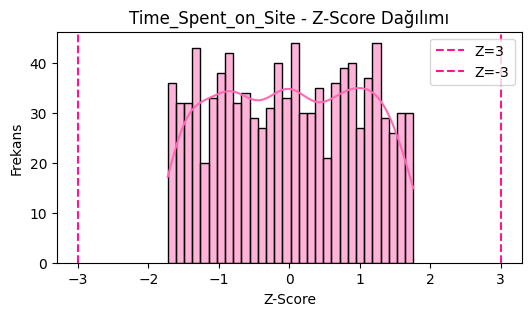


�� Satisfaction_Score Değişkeni İçin Aykırı Değer Analizi
----------------------------------------
IQR Yöntemi:
  Aykırı değer sayısı: 0
  Aykırı değer oranı: %0.00
  Alt sınır: -4.50, Üst sınır: 15.50

Z-Score Yöntemi:
  Z-Score > 3 olan aykırı değer sayısı: 0
  Z-Score > 3 olan aykırı değer oranı: %0.00


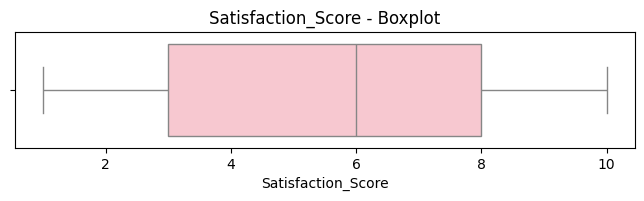

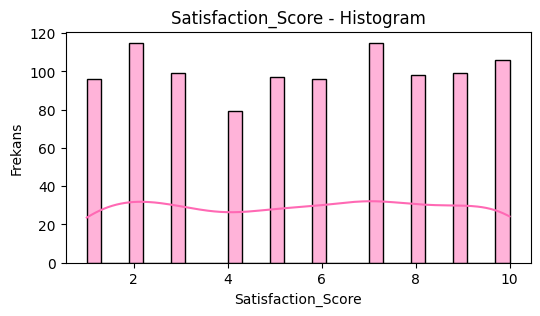

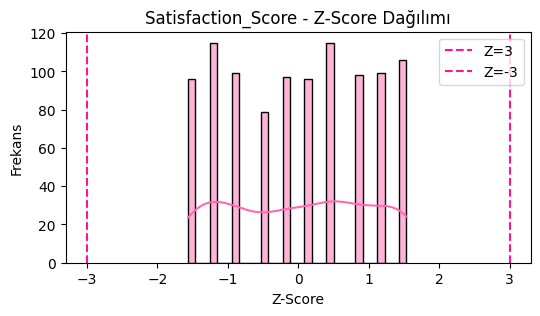

In [3]:
# Sadece sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['number']).columns

print("Aykırı Değer Analizi ve Görselleştirme\n")
print("="*60)

for col in numeric_columns:
    print(f'\n�� {col} Değişkeni İçin Aykırı Değer Analizi')
    print("-"*40)
    
    # IQR Yöntemi
    print("IQR Yöntemi:")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = outliers.count()
    outlier_ratio = 100 * outlier_count / len(df)
    print(f'  Aykırı değer sayısı: {outlier_count}')
    print(f'  Aykırı değer oranı: %{outlier_ratio:.2f}')
    print(f'  Alt sınır: {lower_bound:.2f}, Üst sınır: {upper_bound:.2f}')
    
    # Z-Score Yöntemi
    print("\nZ-Score Yöntemi:")
    if df[col].std() != 0 and not df[col].isnull().all():
        z_scores = zscore(df[col])
        outliers_z = np.where(np.abs(z_scores) > 3)[0]
        outlier_count_z = len(outliers_z)
        outlier_ratio_z = 100 * outlier_count_z / len(df)
        print(f'  Z-Score > 3 olan aykırı değer sayısı: {outlier_count_z}')
        print(f'  Z-Score > 3 olan aykırı değer oranı: %{outlier_ratio_z:.2f}')
    else:
        print("  Z-Score hesaplanamadı (sabit değer veya boş sütun)")

    # Boxplot (pembe ton)
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='pink')
    plt.title(f'{col} - Boxplot')
    plt.show()

    # Histogram (daha canlı pembe ton)
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=30, kde=True, color='hotpink')
    plt.title(f'{col} - Histogram')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.show()
    
    # Z-score histogramı (eğer hesaplanabilirse)
    if df[col].std() != 0 and not df[col].isnull().all():
        plt.figure(figsize=(6, 3))
        sns.histplot(z_scores, bins=30, kde=True, color='hotpink')
        plt.title(f'{col} - Z-Score Dağılımı')
        plt.xlabel('Z-Score')
        plt.ylabel('Frekans')
        plt.axvline(3, color='deeppink', linestyle='--', label='Z=3')
        plt.axvline(-3, color='deeppink', linestyle='--', label='Z=-3')
        plt.legend()
        plt.show()

    print("="*60)

Veri setinde yer alan tüm sayısal değişkenler için hem IQR (Interquartile Range) hem de Z-Score yöntemlerini kullanarak aykırı değer analizini ben gerçekleştirdim. Yaptığım analizler sonucunda, incelediğim hiçbir değişkende istatistiksel olarak anlamlı bir aykırı değere rastlamadım.

İlk olarak, Customer_ID değişkenini ele aldım. IQR ve Z-Score yöntemlerini ayrı ayrı uyguladım ve bu değişkende herhangi bir aykırı değerin olmadığını tespit ettim. Bu da müşteri kimliklerinin sistematik bir yapıda üretildiğini ve uç değer barındırmadığını gösterdi.

Daha sonra Age, Num_Interactions, Feedback_Score, Products_Purchased, Products_Viewed, Time_Spent_on_Site ve Satisfaction_Score gibi müşterilerin davranışsal ve demografik özelliklerini içeren değişkenleri inceledim. Bu değişkenlerde de aykırı bir değere rastlamadım. Bu durum bana, veri toplama sürecinin oldukça kontrollü yürütüldüğünü ve verinin genel yapısının tutarlı olduğunu düşündürdü.

